<a href="https://colab.research.google.com/github/adeliamara/job-analysis/blob/main/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coleta dos dados

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

sheet_id = "105CGy_r6cNHpZveR5_dH4q54ItGw-sL1Y--DU9IXp2I"
sheet_names = ['linkedin', 'indeed', 'gupy']

dataframes = {}

for sheet_name in sheet_names:
    url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    df = pd.read_csv(url)

    dataframes[sheet_name] = df

    df.to_csv(f"{sheet_name}.csv", index=False)
    print(f"Planilha '{sheet_name}' salva como '{sheet_name}.csv'")

linkedin_df = dataframes['linkedin']
indeed_df = dataframes['indeed']
gupy_df = dataframes['gupy']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Planilha 'linkedin' salva como 'linkedin.csv'
Planilha 'indeed' salva como 'indeed.csv'
Planilha 'gupy' salva como 'gupy.csv'


In [ ]:
total_df = pd.concat([linkedin_df, indeed_df, gupy_df], ignore_index=True)

total_collected = len(total_df)

print(f"Total de vagas coletadas: {total_collected}")

Total de vagas coletadas: 4101


# Limpeza

## Removendo duplicadas


In [ ]:
linkedin_df = linkedin_df.drop_duplicates(subset=['title', 'companyName', 'publishedAt'], keep='first')



In [ ]:
indeed_df = indeed_df.drop_duplicates(subset=['postingDateParsed', 'company', 'positionName'], keep='first')
indeed_df

,company,description,descriptionHTML,externalApplyLink,id,isExpired,jobType/0,jobType/1,location,positionName,...,searchInput/country,searchInput/position,jobUrl,urlInput,fonte,termo_busca,jobType/2,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,BairesDev,"At BairesDev®, we've been leading the way in t...","<div><p>At BairesDev&reg;, we've been leading ...",https://br.indeed.com/applystart?jk=634fc6799e...,634fc6799e6a6b2b,False,Tempo integral,NaN,"Ribeirão Preto, SP",.NET Core Developer - Remote Work,...,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=634fc6799e6a6b2b,NaN,indeed,desenvolvedor,NaN,NaN,NaN,NaN
2,CI&T,Nós somos especialistas em tech transformation...,<div><div>N&oacute;s somos especialistas em<b>...,NaN,ff1e917e7a46e0f4,False,Tempo integral,NaN,"Campinas, SP","[ 19182] Developer Java Fullstack, Senior, Cam...",...,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=ff1e917e7a46e0f4,NaN,indeed,desenvolvedor,NaN,NaN,NaN,NaN
3,Beep Saúde,"Somos a Beep Saúde, a maior empresa de saúde d...","<div><p>Somos a Beep Sa&uacute;de, a maior emp...",https://br.indeed.com/applystart?jk=59a8f17f05...,59a8f17f05ae225c,False,NaN,NaN,"Barueri, SP",[Imunizações] Técnico(a) de Enfermagem | Alpha...,...,BR,dev,https://br.indeed.com/viewjob?jk=59a8f17f05ae225c,NaN,indeed,software,NaN,NaN,NaN,NaN
4,Beep Saúde,"Somos a Beep Saúde, a maior empresa de saúde d...","<div><p>Somos a Beep Sa&uacute;de, a maior emp...",https://br.indeed.com/applystart?jk=a3c259aa32...,a3c259aa32f6e1bc,False,NaN,NaN,"Campinas, SP",[Imunizações] Técnico(a) de Enfermagem | Campi...,...,BR,dev,https://br.indeed.com/viewjob?jk=a3c259aa32f6e1bc,NaN,indeed,software,NaN,NaN,NaN,NaN
5,Beep Saúde,"Somos a Beep Saúde, a maior empresa de saúde d...","<div><p>Somos a Beep Sa&uacute;de, a maior emp...",https://br.indeed.com/applystart?jk=40615f34b8...,40615f34b82f21ed,False,NaN,NaN,"Rio de Janeiro, RJ",[Imunizações] Técnico(a) de Enfermagem | São C...,...,BR,dev,https://br.indeed.com/viewjob?jk=40615f34b82f21ed,NaN,indeed,software,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Divulga Vagas - Consultoria OFICIAL,Responsável pela criação de site ou e-commerce...,<div>Respons&aacute;vel pela cria&ccedil;&atil...,https://br.indeed.com/applystart?jk=2fe47e2eff...,2fe47e2eff308166,False,NaN,NaN,"Canoas, RS",WEB DESIGNER (FRONT END) – CANOAS – RS,...,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=2fe47e2eff308166,NaN,indeed,desenvolvedor,NaN,NaN,NaN,NaN
1456,Frontend Now,We are hiring for a *WordPress/HTML/CSS Coach ...,<p>We are hiring for a <b>WordPress/HTML/CSS C...,NaN,36c05e4b3f0f324e,False,Meio período,NaN,Remoto,Web Developer - Coaching Role,...,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=36c05e4b3f0f324e,NaN,indeed,desenvolvedor,NaN,NaN,NaN,NaN
1457,Netvagas,Descrição:\nExperienced web developer with Dru...,<div>Descri&ccedil;&atilde;o:\n<ul><li>Experie...,https://br.indeed.com/applystart?jk=cdfddaed65...,cdfddaed6522a07b,False,NaN,NaN,"Curitiba, PR",Web developer - drupal - ux designer senior,...,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=cdfddaed6522a07b,NaN,indeed,desenvolvedor,NaN,NaN,NaN,NaN
1458,Netvagas,Descrição:\nEnsino superior completo em Engenh...,<div>Descri&ccedil;&atilde;o:\n<ul><li>Ensino ...,https://br.indeed.com/applystart?jk=23e31a78cf...,23e31a78cf1bd008,False,NaN,NaN,"Santa Rita do Sapucaí, MG",Xgmobile - especialista em sistemas ii - desen...,...,BR,desenvolvedor,https://br.indeed.com/viewjob?jk=23e31a78cf1bd008,NaN,indeed,desenvolvedor,NaN,NaN,NaN,NaN


In [ ]:
gupy_df = gupy_df.sort_values(by=['type'], ascending=False, na_position='last')

gupy_df = gupy_df.drop_duplicates(subset=['title', 'company_id'], keep='first')

In [ ]:
total_df = pd.concat([linkedin_df, indeed_df, gupy_df], ignore_index=True)

total_collected = len(total_df)

print(f"Total de vagas coletadas: {total_collected}")

Total de vagas coletadas: 2874


## Defininindo search term (gupy)

In [ ]:
def categorize_title(title):
    if isinstance(title, float):
        title = str(title)
        print(title)
    title = title.lower()

    if 'software' in title:
        return 'software'
    elif 'desenvolvedor' in title or 'dev' in title:
        return 'desenvolvedor'
    else:
        return 'programador'

def fill_termo_busca(row):
    if not pd.isna(row['function']) and row['function'] != '' and row['function'] != 'Unknown' and row['function'] != 'dev':
        return row['function']
    else:
        return categorize_title(row['title'])

gupy_df['termo_busca'] = gupy_df.apply(fill_termo_busca, axis=1)


### Contando por termo de busca

In [ ]:
def count_vacancies_per_term(df, column_name='termo_busca'):
    """
    Counts the number of job vacancies for each search term in a DataFrame.

    Args:
        df: The input DataFrame.
        column_name: The name of the column containing the search terms.

    Returns:
        A pandas Series with the search terms as index and the counts as values.
    """
    return df[column_name].dropna().value_counts()

indeed_vacancy_counts = count_vacancies_per_term(indeed_df)
linkedin_vacancy_counts = count_vacancies_per_term(linkedin_df)
gupy_vacancy_counts = count_vacancies_per_term(gupy_df)

print("Indeed Vacancy Counts:")
print(indeed_vacancy_counts)

print("\nLinkedIn Vacancy Counts:")
print(linkedin_vacancy_counts)

print("\nGupyVacancy Counts:")
print(gupy_vacancy_counts)


Indeed Vacancy Counts:
termo_busca
desenvolvedor    757
programador      298
software         229
Name: count, dtype: int64

LinkedIn Vacancy Counts:
termo_busca
programador      509
desenvolvedor    503
software         292
dev               26
Name: count, dtype: int64

GupyVacancy Counts:
termo_busca
desenvolvedor    130
programador       99
software          31
Name: count, dtype: int64


## Unificando DFS e Padronizando os titulos

In [ ]:
import uuid
import pandas as pd

rename_mapping = {
    'companyId': 'company_id',
    'company': 'company_name',
    'companyName': 'company_name',
    'company_name': 'company_name',
    'location': 'location',
    'Location': 'location',
    'positionName': 'title',
    'title': 'title',
    'experience_level': 'work_type',
    'workType': 'work_type',
    'requirements': 'description',
    'published_date': 'published_date',
    'publishedAt': 'published_date',
    'postingDateParsed': 'published_date',
    'postingDate': 'published_date',
    'termo_busca': 'search_term',
    'scrapedAt': 'created_at',
    'jobUrl': 'job_url',
    'externalApplyLink': 'external_job_url',
    'url': 'external_job_url',
    'applyUrl': 'external_job_url',
    'jobType/0': 'contract_type',
    'contractType': 'contract_type',
    'type': 'contract_type',
    'fonte':  'origin_site_name'
}

linkedin_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(linkedin_df))]
gupy_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(gupy_df))]
indeed_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(indeed_df))]

df1 = linkedin_df.rename(columns=rename_mapping)
df2 = gupy_df.rename(columns=rename_mapping)
df3 = indeed_df.rename(columns=rename_mapping)

all_columns = set(df1.columns).union(set(df2.columns), set(df3.columns))

df1 = df1.reindex(columns=all_columns)
df2 = df2.reindex(columns=all_columns)
df3 = df3.reindex(columns=all_columns)

concatenated_df = pd.concat([df1, df2, df3], ignore_index=True)



<ipython-input-58-a7091f78597a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linkedin_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(linkedin_df))]
<ipython-input-58-a7091f78597a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indeed_df['job_id'] = [str(uuid.uuid4()) for _ in range(len(indeed_df))]


In [ ]:
concatenated_df.columns

Index(['posterFullName', 'rating', 'applicationsCount', 'applyType',
       'company_id', 'description', 'job_url', 'created_at', 'experienceLevel',
       'contract_type', 'reviewsCount', 'origin_site_name', 'descriptionHTML',
       'external_job_url', 'company_name', 'work_type', 'urlInput', 'function',
       'postedAt', 'id', 'searchInput/country', 'salary', 'job_id',
       'postedTime', 'searchInput/position', 'isExpired', 'sector',
       'jobType/2', 'search_term', 'benefits', 'location', 'jobType/1',
       'posterProfileUrl', 'title', 'published_date', 'companyUrl'],
      dtype='object')

## Sanitizando dados




### Removendo linhas com descrição nula

In [ ]:
concatenated_df = concatenated_df.dropna(subset=['description'])  # Remove rows where 'description' is NaN

concatenated_df = concatenated_df[concatenated_df['description'] != '']

concatenated_df


,posterFullName,rating,applicationsCount,applyType,company_id,description,job_url,created_at,experienceLevel,contract_type,...,sector,jobType/2,search_term,benefits,location,jobType/1,posterProfileUrl,title,published_date,companyUrl
0,NaN,NaN,25 applicants,EXTERNAL,3611381.0,"Nível: Analista\n\nCursos de: administração ,á...",https://br.linkedin.com/jobs/view/analista-de-...,NaN,Mid-Senior level,Full-time,...,Truck Transportation,NaN,software,NaN,"Içara, Santa Catarina, Brazil",NaN,NaN,ANALISTA DE PPCP E MATERIAIS,2024-12-13,https://br.linkedin.com/company/librelato-sa?t...
1,NaN,NaN,30 applicants,EXTERNAL,105082562.0,Nível: Analista\n\nCursos de: Orientação Educa...,https://br.linkedin.com/jobs/view/orientador-a...,NaN,Mid-Senior level,Full-time,...,Internet Publishing,NaN,software,NaN,"Florianópolis, Santa Catarina, Brazil",NaN,NaN,Orientador(a) Educacional,2024-12-13,https://br.linkedin.com/company/vagas-abler?tr...
2,NaN,NaN,Be among the first 25 applicants,EXTERNAL,667059.0,Buscamos uma pessoa Estagiária para atuar na á...,https://br.linkedin.com/jobs/view/est%C3%A1gio...,NaN,Internship,Full-time,...,Software Development,NaN,software,NaN,"Florianópolis, Santa Catarina, Brazil",NaN,NaN,Estágio (Financeiro),2024-12-13,https://br.linkedin.com/company/altoqi-tecnolo...
3,NaN,NaN,Be among the first 25 applicants,EXTERNAL,10004268.0,Descrição:\n\nEstamos em busca de um Operador ...,https://br.linkedin.com/jobs/view/operador-cen...,NaN,Not Applicable,Full-time,...,Machinery Manufacturing,NaN,programador,NaN,"Farroupilha, Rio Grande do Sul, Brazil",NaN,NaN,Operador centro de usinagem,2024-12-13,https://br.linkedin.com/company/gruposazi?trk=...
4,NaN,NaN,69 applicants,EXTERNAL,1468.0,TLM Specific vocational training to introduce ...,https://br.linkedin.com/jobs/view/tlm-apprenti...,NaN,Internship,Full-time,...,"Technology, Information and Internet",NaN,software,NaN,"Macaé, Rio de Janeiro, Brazil",NaN,NaN,TLM Apprentice,2024-12-13,https://www.linkedin.com/company/slbglobal?trk...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,NaN,3.6,NaN,NaN,NaN,Java Back End Developer - Junior\n\nIf digital...,https://br.indeed.com/viewjob?jk=81d56c6651759ad6,2024-12-18T04:06:34.827Z,NaN,NaN,...,NaN,NaN,desenvolvedor,NaN,"São Paulo, SP",NaN,NaN,Java Developer - Junior,2024-12-18T02:25:47.000Z,NaN
2870,NaN,NaN,NaN,NaN,NaN,*A PEx ACD CONSULTORIA e TREINAMENTO divulga e...,https://br.indeed.com/viewjob?jk=46e855b4ef9d3ec6,2024-12-18T04:42:20.666Z,NaN,Efetivo CLT,...,NaN,NaN,programador,NaN,"Florianópolis, SC",Tempo integral,NaN,Gerente de Loja,2024-12-18T02:38:41.000Z,NaN
2871,NaN,3.7,NaN,NaN,NaN,Descrição da oferta:\n\nEmpresa de Software ad...,https://br.indeed.com/viewjob?jk=961b11c012f5aab2,2024-12-18T04:06:17.147Z,NaN,Efetivo CLT,...,NaN,NaN,desenvolvedor,NaN,"Recife, PE",Tempo integral,NaN,Desenvolvedor Java e Angular Pleno,2024-12-18T02:46:24.000Z,NaN
2872,NaN,3.7,NaN,NaN,NaN,Descrição da oferta:\n\nIndústria admite Progr...,https://br.indeed.com/viewjob?jk=2360318c0492238b,2024-12-18T04:07:06.526Z,NaN,Efetivo CLT,...,NaN,NaN,desenvolvedor,NaN,"Gravataí, RS",Tempo integral,NaN,Programador CNC,2024-12-18T02:46:24.000Z,NaN



### anuncio em outro idioma


In [ ]:
!pip install langdetect


In [ ]:
import matplotlib.pyplot as plt
from langdetect import detect_langs
import pandas as pd

# Function to filter ads based on the language
def filter_ads_in_language(df, included_language='pt'):
    """Filters ads that are in the specified included language by detecting the language of the 'description' text."""
    def detect_primary_language(text):
        try:
            lang_probs = detect_langs(text)  # Detect language probabilities
            primary_lang = max(lang_probs, key=lambda x: x.prob)  # Get the language with the highest probability
            return primary_lang.lang
        except Exception as e:
            print(f"Error detecting language: {e}")
            return None

    # Create a mask for rows where 'description' is in the included language
    included_mask = df['description'].apply(lambda text: detect_primary_language(text) == included_language)

    # Count included ads
    included_count = included_mask.sum()

    # Create a new DataFrame with only the ads in the specified language
    filtered_df = df[included_mask]

    return filtered_df, included_count


# Filter ads in Portuguese
filtered_df, included_count = filter_ads_in_language(concatenated_df, included_language='pt')

# Display the number of ads selected
print(f"Anúncios selecionados: {included_count}")

# Display the updated DataFrame
print(filtered_df[['description']].head())


Error detecting language: No features in text.
Error detecting language: No features in text.
Anúncios selecionados: 2796
                                         description
0  Nível: Analista\n\nCursos de: administração ,á...
1  Nível: Analista\n\nCursos de: Orientação Educa...
2  Buscamos uma pessoa Estagiária para atuar na á...
3  Descrição:\n\nEstamos em busca de um Operador ...
5  Você é apaixonado por pessoas e tecnologia?\n\...


### Descrição duplicada

In [ ]:
def remove_duplicate_descriptions(df):
    """
    Finds, displays, and removes duplicate ads based on descriptions.

    Args:
        df: The DataFrame containing the ads data.

    Returns:
        A tuple containing:
        - The updated DataFrame with duplicates removed.
        - A DataFrame of the duplicate ads.
    """
    # Filtrar anúncios duplicados
    duplicate_ads = df[df.duplicated(subset=['description'], keep=False)]

    if not duplicate_ads.empty:
        # Ordenar os anúncios duplicados pela coluna 'description'
        duplicate_ads_sorted = duplicate_ads.sort_values(by='description')

        # Exibir os anúncios duplicados
        print("Anúncios com descrições duplicadas (ordenados por descrição):")
        print(duplicate_ads_sorted[['title', 'description', 'origin_site_name']])
        print(f"Número de anúncios com descrições duplicadas: {len(duplicate_ads_sorted)}")

        # Remover duplicados, mantendo apenas a primeira ocorrência
        updated_df = df.drop_duplicates(subset=['description'], keep='first')
    else:
        print("Nenhum anúncio com descrição duplicada encontrado.")
        duplicate_ads_sorted = pd.DataFrame()  # DataFrame vazio para duplicados
        updated_df = df

    return updated_df, duplicate_ads_sorted

# Exemplo de uso
filtered_ads_df, duplicate_ads_df = remove_duplicate_descriptions(filtered_df)

# Atualizar o DataFrame original
filtered_df = filtered_ads_df

# Exibir o resultado
print(f"DataFrame atualizado com duplicatas removidas. Total de linhas: {len(filtered_df)}")


Anúncios com descrições duplicadas (ordenados por descrição):
                                                  title  \
1228                     Programador de Sistemas Júnior   
948                      Programador de Sistemas Júnior   
947                              Programador PHP Júnior   
1227                             Programador PHP Júnior   
41                               Vendedor (Gurupi - TO)   
...                                                 ...   
1526  Programa de Formação de Assessores de Investim...   
808   ANALISTA PROGRAMADOR DRUPAL – REMOTO – RECIFE ...   
809   ANALISTA PROGRAMADOR DRUPAL – REMOTO – RECIFE ...   
1904         PROGRAMADOR PHP JÚNIOR – PORTO ALEGRE – RS   
1974         PROGRAMADOR WEB JÚNIOR – PORTO ALEGRE – RS   

                                            description origin_site_name  
1228   * Desenvolver e manter sistemas e aplicações;...         linkedin  
948    * Desenvolver e manter sistemas e aplicações;...         linkedin  
947 

Analise dados

## Removendo colunas

In [ ]:
columns_to_remove = ['posterFullName', 'posterProfileUrl', 'reviewsCount', 'searchInput/country', 'jobType/1', 'jobType/2', 'descriptionHTML']
concatenated_df = concatenated_df.drop(columns=columns_to_remove, errors='ignore')

# Explorando dados

## Vagas por dia e por origem

<ipython-input-65-aee01e3fbf46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linkedin_df['publishedAt'] = pd.to_datetime(linkedin_df['publishedAt'], errors='coerce')
<ipython-input-65-aee01e3fbf46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indeed_df['postingDateParsed'] = pd.to_datetime(indeed_df['postingDateParsed'], errors='coerce')


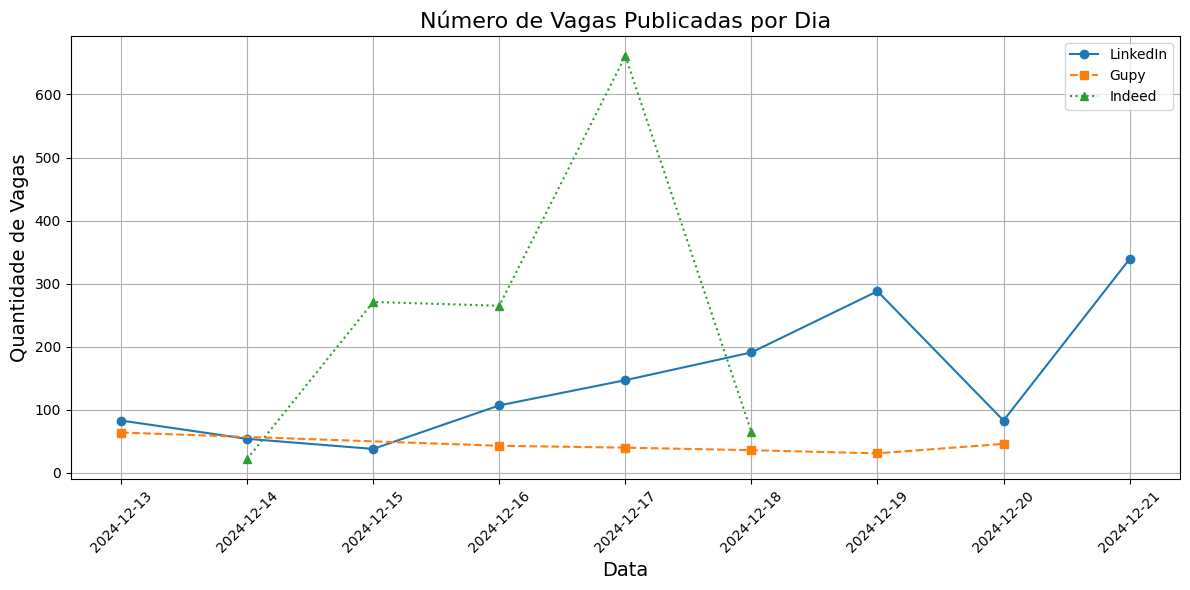

In [ ]:
import matplotlib.pyplot as plt

linkedin_df['publishedAt'] = pd.to_datetime(linkedin_df['publishedAt'], errors='coerce')
gupy_df['published_date'] = pd.to_datetime(gupy_df['published_date'], errors='coerce')
indeed_df['postingDateParsed'] = pd.to_datetime(indeed_df['postingDateParsed'], errors='coerce')

linkedin_daily = linkedin_df.groupby(linkedin_df['publishedAt'].dt.date).size().reset_index(name='job_count')
gupy_daily = gupy_df.groupby(gupy_df['published_date'].dt.date).size().reset_index(name='job_count')
indeed_daily = indeed_df.groupby(indeed_df['postingDateParsed'].dt.date).size().reset_index(name='job_count')

linkedin_daily.columns = ['date', 'job_count']
gupy_daily.columns = ['date', 'job_count']
indeed_daily.columns = ['date', 'job_count']

plt.figure(figsize=(12, 6))

plt.plot(linkedin_daily['date'], linkedin_daily['job_count'], marker='o', linestyle='-', label='LinkedIn')
plt.plot(gupy_daily['date'], gupy_daily['job_count'], marker='s', linestyle='--', label='Gupy')
plt.plot(indeed_daily['date'], indeed_daily['job_count'], marker='^', linestyle=':', label='Indeed')

plt.title('Número de Vagas Publicadas por Dia', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade de Vagas', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Categorizar fonte ❌

In [ ]:
from urllib.parse import urlparse
from collections import Counter
def categorize_url(self, url):
  domains = [urlparse(url).netloc for url in urls]

  domain_counts = Counter(domains)

  return domain_counts

In [ ]:
concatenated_df.loc[(concatenated_df['origin_site_name'] == 'indeed') & (concatenated_df['external_job_url'].isnull()), 'external_job_url'] = concatenated_df['job_url']

In [ ]:
from urllib.parse import urlparse
def categorize_url(url):
    try:
        domain = urlparse(url).netloc
        return domain
    except Exception:
        return str(url)

concatenated_df['source'] = concatenated_df['external_job_url'].apply(categorize_url)

grouped = concatenated_df['source'].value_counts()

print("Domínios detectados:")
print(grouped)


Domínios detectados:
source
br.indeed.com                        1284
www.divulgavagas.com.br               266
vagas.empregos.com.br                 246
br.linkedin.com                       145
www.netvagas.com.br                   133
                                     ... 
topazbrasil.gupy.io                     1
vagascompasi.vagas.solides.com.br       1
vittude.gupy.io                         1
altoqi.inhire.app                       1
vivovita.gupy.io                        1
Name: count, Length: 377, dtype: int64


In [ ]:
def adjust_domain(domain):
    if "gupy" in domain:
        return "Gupy"
    elif "indeed" in domain:
        return "Indeed"
    elif 'linkedin' in domain:
        return 'LinkedIn'
    elif 'solides' in domain:
        return 'solides'
    elif 'infojobs' in domain:
        return 'infojobs'
    elif 'careers' in domain:
        return 'careers'
    elif '99jobs' in domain:
        return '99jobs'
    elif 'inhire' in domain:
        return 'inhire'
    elif 'divulgavagas' in domain:
        return 'divulgavagas'
    elif 'vagas.empregos' in domain:
        return 'vagas.empregos'
    elif 'netvagas' in domain:
        return 'netvagas'
    elif 'selecty' in domain:
        return 'selecty'
    elif 'vagas.com.br' in domain:
        return 'vagas.com.br'
    else:
        return domain

concatenated_df['source'] = concatenated_df['source'].apply(adjust_domain)
grouped = concatenated_df['source'].value_counts()

print("Domínios detectados:")
print(grouped.head(20))


Domínios detectados:
source
Indeed                         1284
Gupy                            389
divulgavagas                    266
vagas.empregos                  246
LinkedIn                        145
netvagas                        133
solides                          53
events-api.bne.com.br            35
www.catho.com.br                 31
inhire                           28
infojobs                         23
jobs.quickin.io                  20
www.buscojobs.com.br             18
atracaodetalentos.totvs.app      14
careers                          12
vagas.com.br                     10
abler.in                         10
bradesco.csod.com                10
www.empregare.com                 9
www.pepsicojobs.com               8
Name: count, dtype: int64


In [ ]:
concatenated_df.count()

,0
rating,580
applicationsCount,1330
applyType,1330
company_id,1133
description,2874
job_url,2614
created_at,1544
experienceLevel,1330
contract_type,1980
origin_site_name,2874


## Contando keywords ❌

In [ ]:
# prompt: conte os tokens de palaras de tecnolgia como java, rails, postgre e oitras mais. naoq uero dado or linha, quero uma lista das palabras qie ,ais aparecça. case insensitive

from collections import Counter

def count_tech_words(df, tech_words):
  """Counts the occurrences of specified technology words in job descriptions.

  Args:
    df: DataFrame with a 'stemmed_tokens' column containing tokenized descriptions.
    tech_words: A list of technology-related words to count.

  Returns:
    A Counter object with technology words as keys and their counts as values.
  """

  tech_word_counts = Counter()
  for tokens in df['stemmed_tokens']:
      for token in tokens:
          if token.lower() in [word.lower() for word in tech_words]:  # Case-insensitive matching
              tech_word_counts[token.lower()] += 1
  return tech_word_counts

# Example usage:
tech_words_to_count = ['java', 'rails', 'postgre', 'python', 'javascript', 'sql', 'aws', 'azure', 'docker', 'kubernetes']

tech_word_counts = count_tech_words(filtered_df, tech_words_to_count)

# Print the most frequent technology words
print(tech_word_counts.most_common())

KeyError: 'stemmed_tokens'

# Modelagem


##Tokenização


In [ ]:
!pip uninstall nltk
!pip install -U nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.10/dist-packages/nltk-3.9.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/nltk/*
Proceed (Y/n)? y
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.1 MB/s eta 0:00:00


In [ ]:
# prompt: como saber a verao do python usada

import sys

print(f"Python version: {sys.version}")

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [ ]:
!pip install --upgrade nltk  # First ensure nltk is upgraded


In [ ]:
import nltk

# Download the 'punkt_tab' resource before using word_tokenize
nltk.download('punkt_tab')
nltk.download('popular') # Download popular packages to avoid circular import issue.

import pandas as pd
from nltk.tokenize import word_tokenize

def tokenize_descriptions(df):
    """Tokeniza as descrições no DataFrame."""
    # Verifica se a coluna 'description' existe
    if 'description' not in df.columns:
        raise ValueError("O DataFrame não contém a coluna 'description'")

    def tokenize_text(text):
        # Trata valores nulos e strings vazias
        if pd.isnull(text) or not isinstance(text, str) or not text.strip():
            return []
        return word_tokenize(text)

    # Adiciona uma nova coluna com as descrições tokenizadas
    df['tokenized_description'] = df['description'].apply(tokenize_text)
    return df


# Tokeniza as descrições
filtered_df = tokenize_descriptions(filtered_df)

# Exibe o resultado
filtered_df[['description', 'tokenized_description']].head()

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

## Limpeza

In [ ]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Converte para minúsculas
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
        text = re.sub(r'\d+', '', text)  # Remove números
        text = re.sub(r'[^\w\s]', '', text)  # Remove pontuações
        text = re.sub(r'[áàâãä]', 'a', text)  # Substitui caracteres especiais
        text = re.sub(r'[éèêë]', 'e', text)
        text = re.sub(r'[íìîï]', 'i', text)
        text = re.sub(r'[óòôõö]', 'o', text)
        text = re.sub(r'[úùûü]', 'u', text)
        text = re.sub(r'[ç]', 'c', text)
        text = re.sub(r'\s+', '', text).strip()  # Remove espaços extras
        text = re.sub(r'[@%&]', '', text)  # Substitui @, % e & por espaço
        return text
    return text

def clean_array(arr):
    if isinstance(arr, list):
        return [clean_text(text) for text in arr]
    return arr


filtered_df['cleaned_description'] = filtered_df['tokenized_description'].apply(clean_array)

filtered_df['cleaned_description']


KeyError: 'tokenized_description'

In [ ]:
def clean_tokens(tokens):
    return [token for token in tokens if token.strip() != '']

filtered_df['cleaned_description'] = filtered_df['cleaned_description'].apply(clean_tokens)

filtered_df[ 'cleaned_description'].head()


## Remoção StopWords

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Função para remover stopwords de uma lista de tokens
def remove_stopwords_from_tokens(tokens, language='portuguese', custom_stopwords=None):
    """
    Remove stopwords de uma lista de tokens usando NLTK e uma lista personalizada.
    """
    if not isinstance(tokens, list):  # Verifica se o valor é uma lista
        return []

    # Obtem as stopwords padrão do NLTK
    nltk_stopwords = set(stopwords.words(language))

    # Adiciona stopwords personalizadas
    if custom_stopwords:
        nltk_stopwords.update(custom_stopwords)

    # Filtra os tokens removendo as stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in nltk_stopwords]

    return filtered_tokens

custom_stopwords = ['divulgavagasoficial', 'siga', 'trabalho', 'voce', 'nosso', 'aqui', 'nbsp', 'insta']
filtered_df['cleaned_description_without_stopwords'] = filtered_df['cleaned_description'].apply(
    lambda tokens: remove_stopwords_from_tokens(tokens, language='portuguese', custom_stopwords=custom_stopwords)
)

filtered_df['cleaned_description_without_stopwords']


In [ ]:
## remover as outroas stop words

## Stemmização

In [ ]:
import pandas as pd
from nltk.stem import RSLPStemmer, PorterStemmer
import nltk

# Baixar o recurso necessário para o stemmer em português
nltk.download('rslp')

# Função para aplicar stemmização
def apply_stemming(tokens, language='portuguese'):
    """
    Aplica stemmização a uma lista de tokens.

    Args:
        tokens (list): Lista de palavras (tokens).
        language (str): Idioma do stemmer ('portuguese' ou 'english').

    Returns:
        list: Lista de tokens após a stemmização.
    """
    if not isinstance(tokens, list):  # Verifica se o valor é uma lista
        return []

    if language == 'portuguese':
        stemmer = RSLPStemmer()
    elif language == 'english':
        stemmer = PorterStemmer()
    else:
        raise ValueError("Idioma não suportado para stemmização")

    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return stemmed_tokens

filtered_df['stemmed_tokens'] = filtered_df['cleaned_description_without_stopwords'].apply(
    lambda tokens: apply_stemming(tokens, language='portuguese')
)

filtered_df['stemmed_tokens']


In [ ]:
filtered_df['cleaned_description_without_stopwords']


In [ ]:
def remove_custom_stopwords(tokens, custom_stopwords):
    """
    Removes custom stopwords from a list of tokens.

    Args:
        tokens: List of tokens (words) to process.
        custom_stopwords: List of custom stopwords to remove.

    Returns:
        List of tokens with custom stopwords removed.
    """
    # Garantir que as stopwords estejam em minúsculas para comparação
    custom_stopwords_set = set(word.lower() for word in custom_stopwords)

    # Filtrar tokens, removendo as custom stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in custom_stopwords_set]

    return filtered_tokens


In [ ]:
# Lista de stopwords personalizadas
others_custom_stopwords = ['sig', 'divulgavagasofic', 'mnim', 'exig', 'port', 'alegr', 'inst', 'atribuico']

# Aplicar a função para remover stopwords personalizadas
filtered_df['stemmed_tokens'] = filtered_df['stemmed_tokens'].apply(
    lambda tokens: remove_custom_stopwords(tokens, custom_stopwords=others_custom_stopwords)
)

# Exibir uma amostra dos dados atualizados
print(filtered_df[['stemmed_tokens']])


## Bag Of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Combina os tokens em strings para o Bag of Words
filtered_df['joined_tokens'] = filtered_df['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Cria o vetorizador para Bag of Words
vectorizer = CountVectorizer()

# Aplica o vetorizador para gerar a matriz de Bag of Words
bow_matrix = vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz em um DataFrame para visualização
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print("\nBag of Words:")
bow_df


In [ ]:
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

print("Principais Bag of Words:")
print(word_counts.head(20))

### Unigrama

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
word_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nTermos mais importantes no corpus (TF-IDF):")
print(word_importance.head(12))

### 2-GRAMA


In [ ]:

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # Gera bigramas (2) e trigramas (3)

# Aplica o TF-IDF ao corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibe os n-gramas mais importantes no corpus
ngrams_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nN-gramas mais importantes no corpus (TF-IDF):")
print(ngrams_importance.head(50))

### 3-GRAMA


In [ ]:

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(3,3))  # Gera bigramas (2) e trigramas (3)

# Aplica o TF-IDF ao corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibe os n-gramas mais importantes no corpus
ngrams_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nN-gramas mais importantes no corpus (TF-IDF):")
print(ngrams_importance.head(50))

### 4-GRAMA


In [ ]:

# Inicializa o vetorizador TF-IDF para bigramas e trigramas
tfidf_vectorizer = TfidfVectorizer(ngram_range=(4,4))  # Gera bigramas (2) e trigramas (3)

# Aplica o TF-IDF ao corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['joined_tokens'])

# Converte a matriz TF-IDF para um DataFrame para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibe os n-gramas mais importantes no corpus
ngrams_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)
print("\nN-gramas mais importantes no corpus (TF-IDF):")
print(ngrams_importance.head(50))

## LDA

In [ ]:
pip install gensim pyLDAvis pandas nltk


In [ ]:
import pandas as pd
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models
import pyLDAvis
import nltk

# Baixar recursos do NLTK
nltk.download('stopwords')
nltk.download('punkt')

# 2. Criação do Dicionário e Corpus para Gensim
# Cada linha representa um documento
dictionary = corpora.Dictionary(filtered_df['stemmed_tokens'])

# Cria o "corpus" (Bag of Words para cada documento)
corpus = [dictionary.doc2bow(text) for text in filtered_df['stemmed_tokens']]

# 3. Treinar o Modelo LDA
num_topics = 5  # Número de tópicos desejados
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Exibir os Tópicos Gerados
print("Tópicos Gerados:")
topics = lda_model.print_topics(num_words=5)
for topic_id, topic in topics:
    print(f"Tópico {topic_id}: {topic}")

# 4. Visualização com pyLDAvis
# Prepara os dados para visualização
lda_vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
# Salvar a visualização em um arquivo HTML
pyLDAvis.save_html(lda_vis_data, 'lda_visualization.html')

print("A visualização foi salva como 'lda_visualization.html'. Abra este arquivo em um navegador.")

from google.colab import files
files.download('lda_visualization.html')


### Selecionando num topicos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


texts = [doc.split() for doc in filtered_df['joined_tokens']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def evaluate_lda_gensim(corpus, dictionary, texts, num_topics_list, alpha_values):
    results = []
    for alpha in alpha_values:
        for num_topics in num_topics_list:
            lda_model = LdaModel(
                corpus=corpus,
                id2word=dictionary,
                num_topics=num_topics,
                alpha=alpha,
                random_state=42
            )
            # Calcular coerência
            coherence_model = CoherenceModel(
                model=lda_model,
                texts=texts,
                dictionary=dictionary,
                coherence='c_v'
            )
            coherence = coherence_model.get_coherence()
            results.append((num_topics, alpha, coherence))
    return results

num_topics_list = [2, 3, 4, 5, 6, 10, 15, 20]
alpha_values = [0.01, 0.1, 1]

lda_results = evaluate_lda_gensim(corpus, dictionary, texts, num_topics_list, alpha_values)

lda_results_df = pd.DataFrame(lda_results, columns=["Num Topics", "Alpha", "Coherence"])

for alpha in alpha_values:
    subset = lda_results_df[lda_results_df["Alpha"] == alpha]
    plt.plot(subset["Num Topics"], subset["Coherence"], label=f"alpha={alpha}")
    plt.title("Coerência por Número de Tópicos")
    plt.xlabel("Número de Tópicos")
    plt.ylabel("Coerência")
    plt.legend()
    plt.show()

print("Resultados do LDA:")
print(lda_results_df)


### Definindo topicos

In [ ]:
# prompt: aplique lda com alpha 0.1 e 15 topico sno joinedtokens

# Assuming 'filtered_df' and other necessary variables are defined from the previous code.

# Prepare texts for Gensim
texts = [doc.split() for doc in filtered_df['joined_tokens']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model with specified alpha and num_topics
num_topics = 3  # Number of topics
alpha = 0.1  # Alpha value
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    alpha=alpha,
    passes=10,  # You can adjust the number of passes
    random_state=42 # for reproducibility
)

# Print the topics with 15 top words
for topic_id, topic in lda_model.print_topics(num_words=15):
    print(f"Tópico {topic_id}: {topic}")

In [ ]:
# prompt: o codigo acima nao exiba em quantos documentos ele englobas cada topico

# ... (Your existing code)

# Assuming 'filtered_df' and other necessary variables are defined from the previous code.

# Prepare texts for Gensim
texts = [doc.split() for doc in filtered_df['joined_tokens']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model with specified alpha and num_topics
num_topics = 3  # Number of topics
alpha = 0.1  # Alpha value
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    alpha=alpha,
    passes=10,  # You can adjust the number of passes
    random_state=42 # for reproducibility
)

# Get document-topic distributions
doc_topic_dists = lda_model.get_document_topics(corpus, minimum_probability=0)

# Count documents per topic
topic_counts = {}
for doc_dist in doc_topic_dists:
    dominant_topic = max(doc_dist, key=lambda item: item[1])[0]
    topic_counts[dominant_topic] = topic_counts.get(dominant_topic, 0) + 1

# Print the topics with 15 top words and document counts
for topic_id, topic in lda_model.print_topics(num_words=15):
    doc_count = topic_counts.get(topic_id, 0)
    print(f"Tópico {topic_id} ({doc_count} documentos): {topic}")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.table import Table

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary


# Preparing the data for LDA
texts = [doc.split() for doc in filtered_df['joined_tokens']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
num_topics = 3
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Extract topics and their terms
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
terms_by_topic = {topic_id: [term for term, _ in terms] for topic_id, terms in topics}

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Define the table properties
columns = [f"Tópico {i + 1}" for i in range(num_topics)]
rows = max(len(terms) for terms in terms_by_topic.values())
data_matrix = [["" for _ in columns] for _ in range(rows)]

for topic_id, terms in terms_by_topic.items():
    for i, term in enumerate(terms):
        data_matrix[i][topic_id] = term

# Draw the table
ax_table = Table(ax, bbox=[0, 0, 1, 1])
for i, column in enumerate(columns):
    ax_table.add_cell(0, i, width=0.25, height=0.1, text=column, loc='center', facecolor='black')

for row_idx, row in enumerate(data_matrix):
    for col_idx, cell_text in enumerate(row):
        facecolor = 'white'
        if row_idx % 2 == 0:
            facecolor = '#f2f2f2'
        ax_table.add_cell(row_idx + 1, col_idx, width=0.25, height=0.1, text=cell_text, loc='center', facecolor=facecolor)

# Add the table to the plot
ax.add_table(ax_table)

# Draw connections between terms in different topics
for topic_id, terms in terms_by_topic.items():
    for other_topic_id, other_terms in terms_by_topic.items():
        if topic_id != other_topic_id:
            for term in set(terms) & set(other_terms):
                start_row = terms.index(term)
                end_row = other_terms.index(term)
                start_pos = (topic_id * 0.25 + 0.125, 1 - (start_row + 1) * 0.1)
                end_pos = (other_topic_id * 0.25 + 0.125, 1 - (end_row + 1) * 0.1)
                ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], color='gray', lw=1, linestyle='--')

# Title and layout adjustments
ax.set_title("Principais termos para cada tópico da LDA", fontsize=14, pad=20)
plt.show()


## Classificação

In [ ]:
# prompt: aplique k means e algum outro algirmo para classificar os joined tokens e mostre os clusters de palaras

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Convert the 'joined_tokens' column to a numerical representation using TF-IDF
vectorizer = TfidfVectorizer()
filtered_df['joined_tokens2'] = filtered_df['cleaned_description_without_stopwords'].apply(lambda x: ' '.join(x))

X = vectorizer.fit_transform(filtered_df['joined_tokens2'])

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):  # Test clusters from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
filtered_df['kmeans_cluster'] = cluster_labels

# Example using DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X.toarray())  # Convert sparse matrix to dense for DBSCAN
filtered_df['dbscan_cluster'] = dbscan_labels

fig, ax = plt.subplots(figsize=(10, 6))
for cluster_id in range(optimal_n_clusters):
    cluster_docs = filtered_df[filtered_df['kmeans_cluster'] == cluster_id]
    cluster_words = ' '.join(cluster_docs['joined_tokens2'].tolist())
    cluster_top_words = cluster_words.split()[:10]  # Top 10 words per cluster
    cluster_doc_count = len(cluster_docs)
    ax.text(0.1, 1 - (cluster_id * 0.1), f"Cluster {cluster_id + 1} ({cluster_doc_count} documentos): {', '.join(cluster_top_words)}", fontsize=12)

ax.set_title("KMeans Clusters", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

# Visualize clusters for DBSCAN
fig, ax = plt.subplots(figsize=(10, 6))
for cluster_id in np.unique(dbscan_labels):
    if cluster_id != -1:  # Exclude noise points (-1)
        cluster_docs = filtered_df[filtered_df['dbscan_cluster'] == cluster_id]
        cluster_words = ' '.join(cluster_docs['joined_tokens2'].tolist())
        cluster_top_words = cluster_words.split()[:10]  # Top 10 words per cluster
        cluster_doc_count = len(cluster_docs)
        ax.text(0.1, 1 - (cluster_id * 0.1), f"DBSCAN Cluster {cluster_id + 1} ({cluster_doc_count} documentos): {', '.join(cluster_top_words)}", fontsize=12)

ax.set_title("DBSCAN Clusters", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
filtered_df['cleaned_description_without_stopwords']

# Outras analises

## Salário

In [ ]:
filtered_df.columns

In [ ]:
filtered_df.dropna(subset=['salary'])['salary'].head(42)


In [ ]:
# prompt: R$2,385.29/mo - R$2,385.29/mo
# ao processar isso deveria devolver a media 2385.29
# R$ 5.000 – R$ 12.000 por mês
# ao processar isso deveria devolver a media 8500.00
# R$ 3.000 por mês
# ao processar isso deveria devolver a media  3000
# tem que lidar diferente quando é /mo e quando é por mes

import re

def parse_salary(salary):
    """
    Extracts the average salary from a salary string.

    Args:
        salary_string: The salary string to process.

    Returns:
        The average salary as a float, or None if the salary cannot be extracted.
    """
    # Handle cases with "/mo" or "por mês"
    salary_string = str(salary)
    if "mo" in salary_string:
        # Use regular expression to find numbers with or without commas
      parts = salary_string.split("-")
      if len(parts) == 2:
            try:
              min_salary = float(parts[0].replace("R$", "").replace(',', '').replace("/mo", "").strip())
              max_salary = float(parts[1].replace("R$", "").replace(',', '').replace("/mo", "").strip())
              avg_salary = (min_salary + max_salary) / 2
              return avg_salary
            except (ValueError, IndexError):
                return None
      else:
            matches = re.findall(r"R\$[\s]?([\d.,]+)", salary_string)
            if matches:
                try:
                    salary = float(matches[0].replace(',', ''))
                    return salary
                except (ValueError, IndexError):
                    return None
            else:
                return None
    elif "por mês" in salary_string:
        # Split the string into ranges and extract numerical values
        parts = salary_string.split("–")
        if len(parts) == 2:
            try:
              min_salary = float(parts[0].replace("R$ ", "").replace('.', '').replace(',', '.'))
              max_salary = float(parts[1].replace("R$ ", "").replace('.', '').replace(',', '.').replace("por mês", "").strip())
              avg_salary = (min_salary + max_salary) / 2
              return avg_salary
            except (ValueError, IndexError):
                return None
        else:
            # Match a single salary value
            match = re.search(r"R\$[\s]?([\d.]+)", salary_string)
            if match:
              try:
                salary = float(match.group(1).replace('.', '').replace(',', '.'))
                return salary
              except (ValueError, IndexError):
                  return None
            else:
                return None
    else:
        return None


In [ ]:
filtered_df['clean_salary'] = filtered_df['salary'].apply(parse_salary)
filtered_df.dropna(subset=['clean_salary'])[['salary','clean_salary']].head(50)


In [ ]:
filtered_df_salary = filtered_df.dropna(subset=['clean_salary'])


salary_stats = filtered_df_salary['clean_salary'].describe()
print("Salary Statistics:\n", salary_stats)

plt.figure(figsize=(10, 6))
plt.hist(filtered_df_salary['clean_salary'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df_salary['clean_salary'])
plt.ylabel('Salary')
plt.title('Salary Boxplot')
plt.show()

# Identify potential outliers (using IQR method as an example)
Q1 = filtered_df_salary['clean_salary'].quantile(0.25)
Q3 = filtered_df_salary['clean_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = filtered_df_salary[(filtered_df_salary['clean_salary'] < lower_bound) | (filtered_df_salary['clean_salary'] > upper_bound)]
print("\nPotential Outliers:\n", outliers['clean_salary'])


In [ ]:
# prompt: quero que pegue ate 2 linhas da descriça~p dps da apalrva salario ou salário. por exemlpo salario:
#  a combina

import pandas as pd

def get_description_lines(df):
    # Assuming 'filtered_df' is your DataFrame
    # and 'description' column contains the job descriptions

    def extract_lines(description):
        try:
          description_str = str(description)
          salary_index = description_str.lower().find("salário")
          if salary_index == -1:
              salary_index = description_str.lower().find("salario")
          if salary_index != -1:
            lines = description_str[salary_index:].split('\n')
            return '\n'.join(lines[0:min(2,len(lines))])
          else:
              return None
        except Exception as e:
            return f"Erro ao processar descrição: {e}"


    df['description_lines'] = df['description'].apply(extract_lines)
    return df

# Example usage (replace 'your_dataframe' with the actual DataFrame name)
# Assuming your dataframe is named 'filtered_df' as in your provided code.
filtered_df = get_description_lines(filtered_df)

filtered_df['description_lines'].dropna()

In [ ]:
# prompt: filtre os que salary é nan e description line nao

filtered_df_filtered = filtered_df[filtered_df['salary'].isna() & filtered_df['description_lines'].notna()]
print(filtered_df_filtered[['description_lines', 'description']])

In [ ]:
# Importações
import nltk  # Importa a biblioteca NLTK
from collections import Counter
from nltk.tokenize import word_tokenize

# Baixar recursos necessários (uma única vez)
nltk.download('punkt')  # Tokenizer para palavras
nltk.download('stopwords')  # Stopwords padrão

def unigram_analysis(df):
    # Tokenize a coluna 'description_lines'
    unigrams_all = []
    for description in df['description_lines'].dropna():
        tokens = word_tokenize(description.lower())  # Convert para letras minúsculas
        unigrams_all.extend(tokens)

    # Contar a frequência de cada unigram
    unigram_counts = Counter(unigrams_all)

    # Obter os unigrams mais comuns
    most_common_unigrams = unigram_counts.most_common(10)  # Alterar 10 para mais/menos

    print("Most Common Unigrams:")
    for unigram, count in most_common_unigrams:
        # Calcular o número de anúncios que contêm o unigram
        num_ads = df['description_lines'].dropna().str.contains(rf'\b{unigram}\b', case=False).sum()
        print(f"- {unigram}: {count} occurrences, {num_ads} ads")

# Exemplo de uso
# unigram_analysis(filtered_df)


AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [ ]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "This is a test sentence."
tokens = word_tokenize(text)
print(tokens)


AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [ ]:
# prompt: crie um csv de filtered_df_filtered
from google.colab import files
filtered_df.to_csv('filtered_df.csv', index=False)
files.download('filtered_df.csv')

In [ ]:
# prompt: exemplos de description line   salário;\n * Participação nos lucros e resulta...
# 54      salário por ano;\n\n▪︎ Oportunidade de aprendi...
# 56      Salários competitivos;\n * Plano médico e odon...
# 58      salário.\n\nVale Presente de Aniversário: Não ...
#                               ...
# 2843    Salário Fixo: R$ 2.288,00\nTeto de comissão me...
# 2870    Salário fixo – *R$ 3.500,00 *mensal + comissão...
# 2871                  Salário:\nA combinar.\nObservações:
# 2872                  Salário:\nA combinar.\nObservações:
# 2873                  Salário:\nA combinar.\nObservações:
# Name: description_lines, Length: 474, dtype: object
# traga todos que fazem menção a valor

import re

def extract_salary_values(description_lines):
    """
    Extracts salary values (numerical amounts) from description lines.

    Args:
        description_lines (pd.Series): A pandas Series containing job description lines.

    Returns:
        pd.Series: A pandas Series containing lists of extracted salary values
                   (floats or integers) for each description line.
    """

    def extract_from_line(line):
        # Regular expression to find numerical amounts with or without currency symbols (R$, $)
        matches = re.findall(r"(?:R\$|\$)?\s*([\d.,]+(?:\.\d+)?)", line)
        values = []
        for match in matches:
            try:
                values.append(float(match.replace('.', '').replace(',', '.')))  # Convert to float
            except ValueError:
                pass  # Ignore invalid number formats
        return values

    return description_lines.astype(str).apply(lambda x: [val for line in x.split('\n') for val in extract_from_line(line)])

# Apply the function to your 'description_lines' column
filtered_df['extracted_salary_values'] = extract_salary_values(filtered_df['description_lines'])

# Display rows with extracted salary values
print(filtered_df[filtered_df['extracted_salary_values'].apply(lambda x: len(x) > 0)][['description_lines', 'extracted_salary_values']])

In [ ]:
# prompt: como criar uma coluna nova somente com o maior valor de extracted_salary. se for menor que 1000, nem colocar

import pandas as pd

# Assuming 'filtered_df' is your DataFrame and it already contains the 'extracted_salary_values' column.

def get_max_salary(salary_list):
  """
  Returns the maximum salary from a list, or None if the list is empty or all values are less than 1000.
  """
  if not salary_list:
    return None

  max_salary = 0
  for salary in salary_list:
    if salary >= 1000:
        max_salary = max(max_salary, salary)

  if max_salary == 0:
      return None
  else:
    return max_salary


filtered_df['max_extracted_salary'] = filtered_df['extracted_salary_values'].apply(get_max_salary)

In [ ]:
# prompt: exiba todos os max_extracted_salary em que not null

# Display all non-null 'max_extracted_salary' values
print(filtered_df[filtered_df['max_extracted_salary'].notnull()]['max_extracted_salary'])

In [ ]:
# prompt: conte em filtered quantos Salário:\nA combinar.

print(filtered_df[filtered_df['description_lines'].str.contains('Salário:\nA combinar', na=False)].shape[0])

In [ ]:
filtered_df

In [ ]:
# prompt: exiba todas vagas linkedin com nome desenvolvedor front end Desenvolvedor front end print e a description delas

# Assuming 'filtered_df' is your DataFrame containing job data.
# Assuming 'description' column contains the job descriptions.


# Filter for "Desenvolvedor Front End" in the title (case-insensitive)
front_end_jobs = filtered_df[filtered_df['title'].str.contains('Desenvolvedor Front End', case=False, na=False)]


# Display the title and description for matching jobs
for index, row in front_end_jobs.iterrows():
    print("Title:", row['title'])
    print("Description:", row['description'])
    print("-" * 20)  # Separator between job postings
